# Practicum/TrPlNTeN. PROYECT S9 Data-driven Decisions.

**En esta oportunidad Soy analista en una gran tienda en línea. Junto con el departamento de marketing  recopilamos una lista de hipótesis que pueden ayudar a aumentar los ingresos.**

**Debemos que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.**


**Tenemos datos con 9 diferentes hipotesis. Debemos aplicar freamworks como ICE Y RISE, para elvaluar cual es la mejor decision para llevara a cabo la hipotesis de acuerdo a estos rsultados.**

**Analizaremos los resultados de nustro Test A/B para determinar cual es el cambio que tiene el mejor impacto de cada grupo.**

**Tomaremos decisiones objetivas basadas en los resultados del analisis, los calculos y visualizaciones generadas a apartir de los datos que tenemos, y recomendaremos acciones precisas imediatas para que en el futuro los resultados sean los esperados.**

# 1.En primera instancia analizaremos los datos que tienen las hipotesis a priorizar para verificar si necesitan una modificasion.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
Hyppthesis = "hypotheses_us.1.csv"

Orders = "orders_us.1.csv"

Visits = "visits_us.1.csv"

In [13]:
df_hphs_raw = pd.read_csv('hypotheses_us.1.csv')
df_orders = pd.read_csv('orders_us.1.csv')
df_visitors = pd.read_csv('visits_us.1.csv')
df_hphs_raw.head(10)

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


Ahora vericaremos la informacion geneal de DataFrame.

In [14]:
df_hphs_raw.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 1.4 KB


Notamos que las columnas estan en una sola fila, separadas por puntos y comas.Para hacer los calculos y priorizar las hipotesis, debemos separar esa columna separada por ; a multiples columnas que tengan datos de punto de coma flotante para que sean utilies, y priorizar la mejor hippotesis. 

In [15]:
df_hphs = df_hphs_raw['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)
df_hphs.columns = ['hypotheses', 'reach', 'impact', 'confidence', 'effort']
df_hphs.head(10)

,hypotheses,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Separamos de esta manera la única columna presente en el DataFrame en múltiples columnas usando el delimitador ';'.Ahora vericaremos la informacion general de nuevo.

In [16]:
df_hphs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypotheses  9 non-null      object
 1   reach       9 non-null      object
 2   impact      9 non-null      object
 3   confidence  9 non-null      object
 4   effort      9 non-null      object
dtypes: object(5)
memory usage: 492.0+ bytes


Una vez que tenemos nuestras columnas por separado, solo resta transformar los tipos de datos al correcto, para realizar los calculos  de priorizacion de hipotesis necesarios.

In [17]:
df_hphs['reach'] = df_hphs['reach'].astype(float)
df_hphs['impact'] = df_hphs['impact'].astype(float)
df_hphs['confidence'] = df_hphs['confidence'].astype(float)
df_hphs['effort'] = df_hphs['effort'].astype(float)
display(df_hphs.head())
df_hphs.info(memory_usage = 'deep')

,hypotheses,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hypotheses  9 non-null      object 
 1   reach       9 non-null      float64
 2   impact      9 non-null      float64
 3   confidence  9 non-null      float64
 4   effort      9 non-null      float64
dtypes: float64(4), object(1)
memory usage: 1.6 KB


Tenemos entonces nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con riesgo(Reach),impacto(Impact), confianza(Confidence) y esfuerzo(Effort).Con el tipo correcto de datos y en aplicado el formato snake_case. Ahora vamos a aplicar el freamwork ICE para  priorizar hypotesis.

In [18]:
df_hphs['ICE'] = (df_hphs['impact'] * df_hphs['confidence']) / df_hphs['effort']
df_hphs_sorted = df_hphs.sort_values(by='ICE', ascending=False)
df_hphs_sorted[['hypotheses', 'reach', 'impact', 'confidence', 'effort', 'ICE']]

,hypotheses,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1.0,9.0,9.0,5.0,16.200000
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0,13.333333
7,Add a subscription form to all the main pages....,10.0,7.0,8.0,5.0,11.200000
6,Show banners with current offers and sales on ...,5.0,3.0,8.0,3.0,8.000000
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0,7.000000
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0,2.000000
5,Add a customer review page. This will increase...,3.0,2.0,2.0,3.0,1.333333
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0,1.125000
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0,1.000000


Calculamos el Impacto la confianza y la fiablidad (ICE), de cada una las hipotesis multiplicando el impacto de cada una de las hipotesis por la confianza de estas mismas, dividimos este valor por la cantidad de esfuerzo necesario para llevar a cabo las hipótesis, y ordenamos esta puntuacion de (ICE) de forma descendence.

Ahora para llegar a una conclusion especifica, vamos a visualizar los resultados de calificasiones ICE en un grafico de barras.

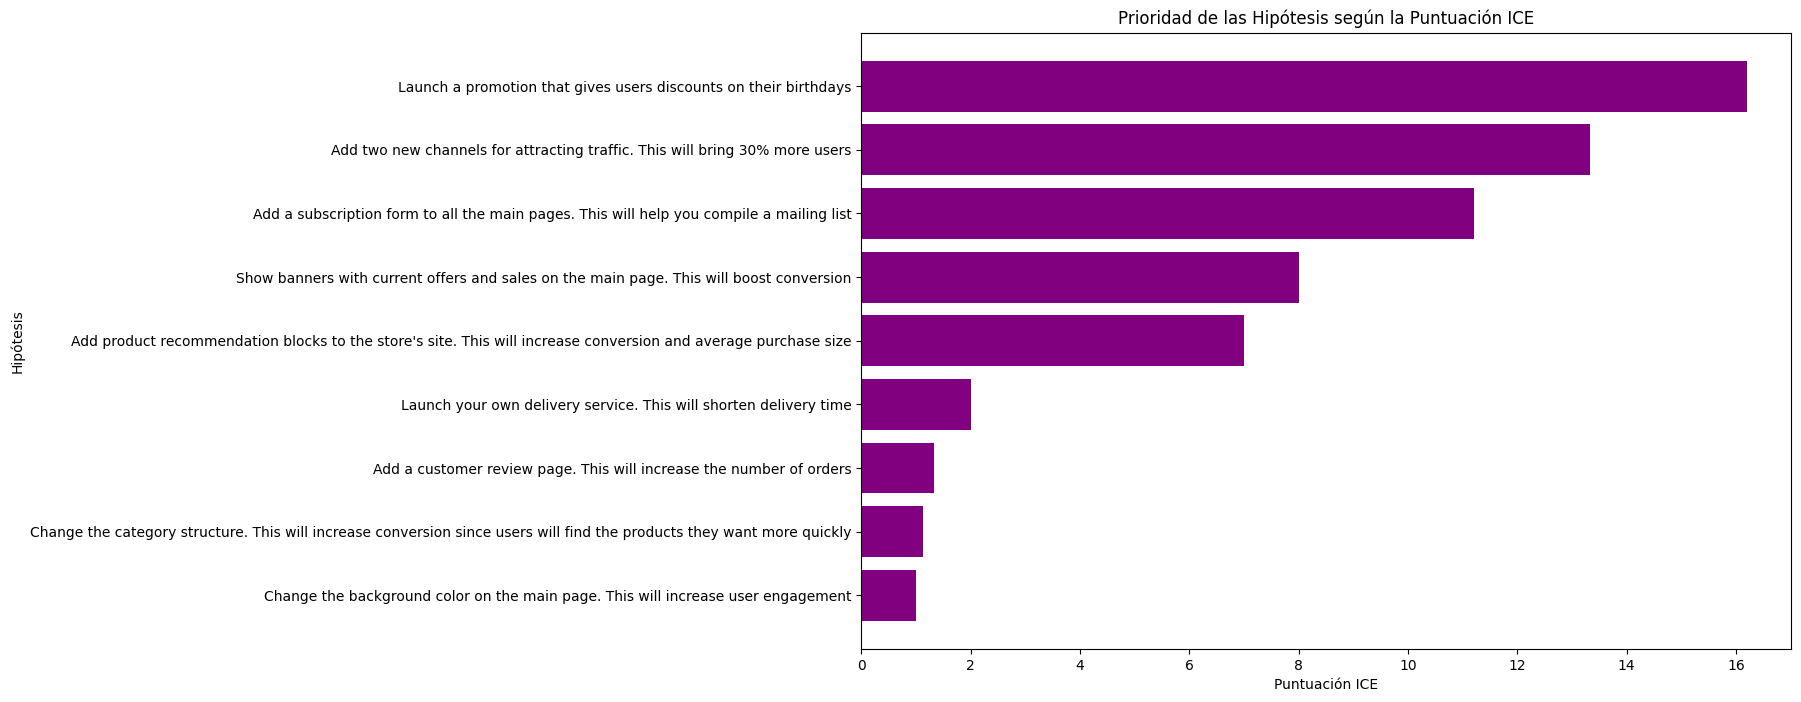

In [19]:
plt.figure(figsize=(12, 8))
plt.barh(df_hphs_sorted['hypotheses'], df_hphs_sorted['ICE'], color='purple')
plt.xlabel('Puntuación ICE')
plt.ylabel('Hipótesis')
plt.title('Prioridad de las Hipótesis según la Puntuación ICE')
plt.gca().invert_yaxis() 
plt.show()

**Al parecer la mejor puntuacion en este freamwork es para la hipotesis que postula que lancemos un servicio de deliveri para la tienda en linea, y de esta forma poder analizar el tiempo de entrega de cada uno de los pedidos.** 

Aplicaremos  tambien otro freamwork  parecido a este llamado (RISE), para verificar si el resultado es el mismo, o difieren sus calificasiones, en cuyo caso deberiamos presentar una explicasion clara de esta diferenciasion.

In [20]:
df_hphs['RICE'] = (df_hphs['reach'] * df_hphs['impact'] * df_hphs['confidence']) / df_hphs['effort']
df_hphs.head(10)

,hypotheses,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0,13.333333,40.0
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0,2.000000,4.0
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0,7.000000,56.0
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0,1.125000,9.0
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0,1.000000,3.0
5,Add a customer review page. This will increase...,3.0,2.0,2.0,3.0,1.333333,4.0
6,Show banners with current offers and sales on ...,5.0,3.0,8.0,3.0,8.000000,40.0
7,Add a subscription form to all the main pages....,10.0,7.0,8.0,5.0,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1.0,9.0,9.0,5.0,16.200000,16.2


Ahora tenemos una columna que calcula el (RICE) mediante la multiplicasion del riego de cada hipotesis, el impacto que genera, y la confianzad de cada una de ellas, dividiendo este resulytado por el esfuerzo requerido de estas hipotesis.

In [21]:
df_hphs_sorted_rice = df_hphs.sort_values(by='RICE', ascending=False)
df_hphs_sorted_rice[['hypotheses', 'reach', 'impact', 'confidence', 'effort', 'RICE']]

,hypotheses,reach,impact,confidence,effort,RICE
7,Add a subscription form to all the main pages....,10.0,7.0,8.0,5.0,112.0
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0,56.0
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0,40.0
6,Show banners with current offers and sales on ...,5.0,3.0,8.0,3.0,40.0
8,Launch a promotion that gives users discounts ...,1.0,9.0,9.0,5.0,16.2
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0,9.0
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0,4.0
5,Add a customer review page. This will increase...,3.0,2.0,2.0,3.0,4.0
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0,3.0


Ordenamos el resultado de este freamwork de forma decsendente y verificamos las hipotesis ordenadas por RICE. y vamos a visualizarla tambien en un grafico de barras para llegara a conclusiones.

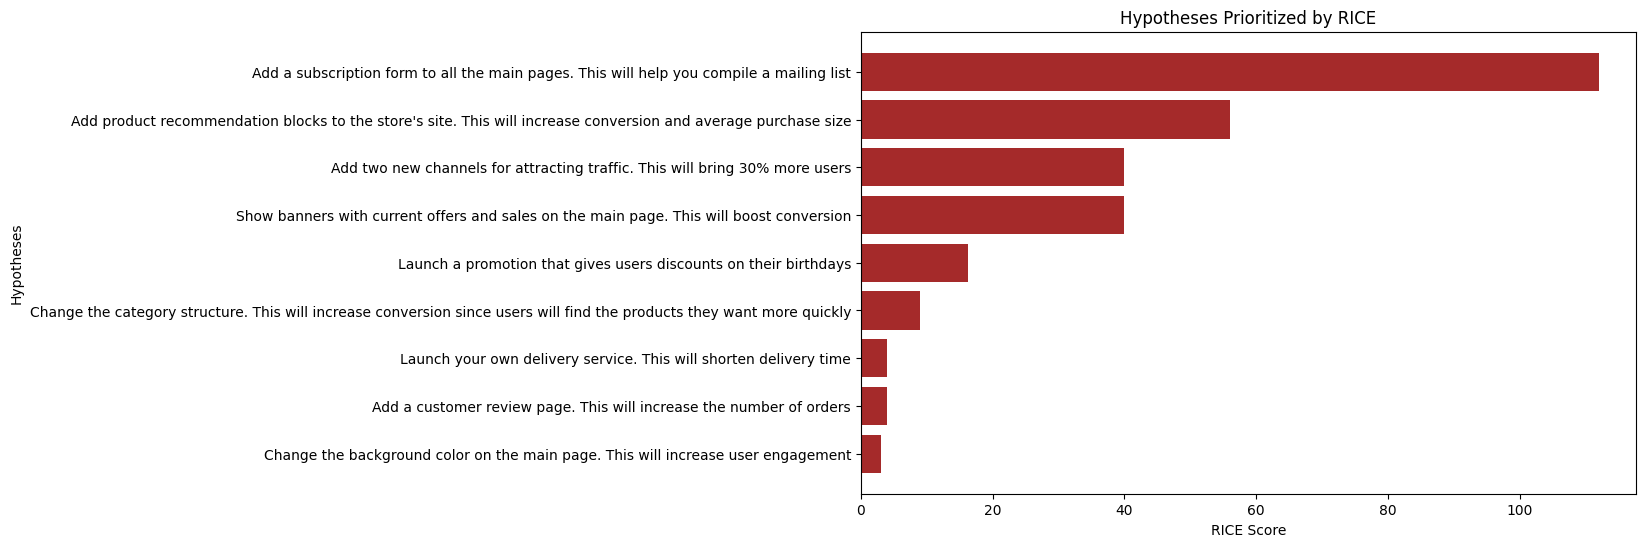

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(df_hphs_sorted_rice['hypotheses'], df_hphs_sorted_rice['RICE'], color='brown')
plt.xlabel('RICE Score')
plt.ylabel('Hypotheses')
plt.title('Hypotheses Prioritized by RICE')
plt.gca().invert_yaxis() 
plt.show()

**En este freamwork, la hypotesis que resulto mas comfiable postula en cambio que debemos Agregar un formulario de suscripción a todas las páginas principales, para compilar de esta forma una lista de correos.**

Ahora vamos a obtener conclusiones, respecto a la priorizacion de las hypotesis segun este analisis preliminar.

***Las hipótesis priorizadas por ICE se basan principalmente en el impacto y la confianza, sin considerar el alcance del usuario.***

***Las hipótesis priorizadas por RICE tienen en cuenta tanto el impacto como el alcance del usuario, ofreciendo una perspectiva más amplia del potencial efecto sobre los usuarios.***


***Es probable que  este cambio de posición significativo entre ICE y RICE de las hipótesis, especialmente se deba a aquellas con alto alcance pero impacto o confianza moderados.***

# 2. Ahora pasaremos alanalisis del  test A/B  

Realizamos un test A/B y obtuvios los resultados descritos en los archivos DataFrames df_orders y df_visitors. Asi que vamos a verificrlos, para realizar un preprocesamineto de los mismos.Comnezaremos con el dataframe de los pedidos de la tienda.

In [23]:
display(df_orders.head(10))
df_orders.info(memory_usage = 'deep')

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 155.6 KB


Contamos con almenos 1190 pedidos  en total, antes de transfomrar las columnas al tipo de dato necesario, vamos a realizar una descripcion de general de los datos, asi como vericar valores duplicados y aausentes.

In [24]:
df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [25]:
df_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [26]:
df_orders.duplicated().sum()

0

De esta manera verificamos que no tenemos valores duplicados ni asuentes en nustra tabal de pedidos realizados, y segun la descripcion general tenemos buenas metricas.Ahora solo resta transformar las columnas a los tipos de datos necesarios para llegar a nuestras conclusiones.

In [27]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 96.0 KB


Con esta modificasion, redujimos el tamaño de memoria que ocupa nuestro dataframe y tenemos los datos con el tipo correcto para realizar los calculos, este preprocesamiento se realizo a  manera de comprobacion unicamente, ya que tampoco queremos alterar los datos originales de la tabla, por que nos seran utilies proximamente.Ahora continuaremos con el DataFrame de las visitas al sitio web.

In [28]:
display(df_visitors.head())
df_visitors.info(memory_usage = 'deep')

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 7.2 KB


Tenemos alrederor de 61 registros en nuestro DtaraFrame de visitas, vamos a asegurarnos que no tenemos datos nulos ni dupliacados, asi como realizar una descripcion general de los datos,antes de realizar las modificasiones a los tipos de datos correspondientes.

In [29]:
df_visitors.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [30]:
df_visitors.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [31]:
df_visitors.duplicated().sum()

0

Al verificar que no tenemos datos ni duplicados ni nulos, podriamos comentar que las metricas de la descripcion general de los datos, nos dan un aexcelente percepcion de como se estan distribuyendo cada uno de ellos. Ahora solo resta transformar las columnas al tipo necesario para poder opoerar con ellas.

In [32]:
df_visitors['date'] = pd.to_datetime(df_visitors['date'])
df_visitors.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.1 KB


Una vez que optimizamos los datos y los preprocesamos para poder trabajr con ellos. Analizaremos los resultados de los test A/B. Primeramnete representando gráficamente el ingreso acumulado por grupo.

In [33]:
df_orders = df_orders.sort_values(by='date')
df_orders['cumulative_revenue'] = df_orders.groupby('group')['revenue'].cumsum()

una vez que nos aseguramos que los datos estan ordenados por fecha, realizamos una agrupacion para calcular el beneficio genrado por cada uno de los grupos.

**Antes que nada, filtraremos los datos  para seguir trabajando, ya puede ser posible que haya errores en los datasets originales, y uno muy comun es que en algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.**

In [34]:
group_a_users = df_orders[df_orders['group'] == 'A']['visitorId'].unique()
group_b_users = df_orders[df_orders['group'] == 'B']['visitorId'].unique()
repeated_users = np.intersect1d(group_a_users, group_b_users)
display(f"Usuarios repetidos en ambos grupos: {len(repeated_users)}")

'Usuarios repetidos en ambos grupos: 58'

De esta manera, indicamos los usuariios unicos en cada uno de los grupos y denotamos cuantos usuarios estan en ambos grupos. Ahora sabemos que tenemos 58 usuarios que estan presentes en ambos grupos del test A/B.

Filtraremos estos datos de df_orders para excluir a los usuarios repetidos asi como tambien los usuarios en df_visitors.

In [35]:
df_orders_cleaned = df_orders[~df_orders['visitorId'].isin(repeated_users)]
display(f"Pedidos después de eliminar usuarios repetidos: {df_orders_cleaned.shape[0]}")
df_orders_cleaned.head()

'Pedidos después de eliminar usuarios repetidos: 1016'

,transactionId,visitorId,date,revenue,group,cumulative_revenue
168,2065527789,1581167209,2019-08-01,30.4,A,30.4
73,1295850747,2947100995,2019-08-01,455.8,A,486.2
72,477940151,1422773200,2019-08-01,15.8,A,502.0
70,3574407166,2328378067,2019-08-01,140.4,B,306.1
66,4919758,1217561296,2019-08-01,40.2,B,346.3


Tenemos un total de 1016 usuarios que han realizado pedidos unicos en nuestro nuevo dataframe.Es asi como obtenemos una tabla de usuarios que se  no tienen usuarios que se repitan en ambos grupos de la pruba de hipotesis en el dataframe de ordenes. Esto nos sera util para obtener nuestras conclusiones axactas.

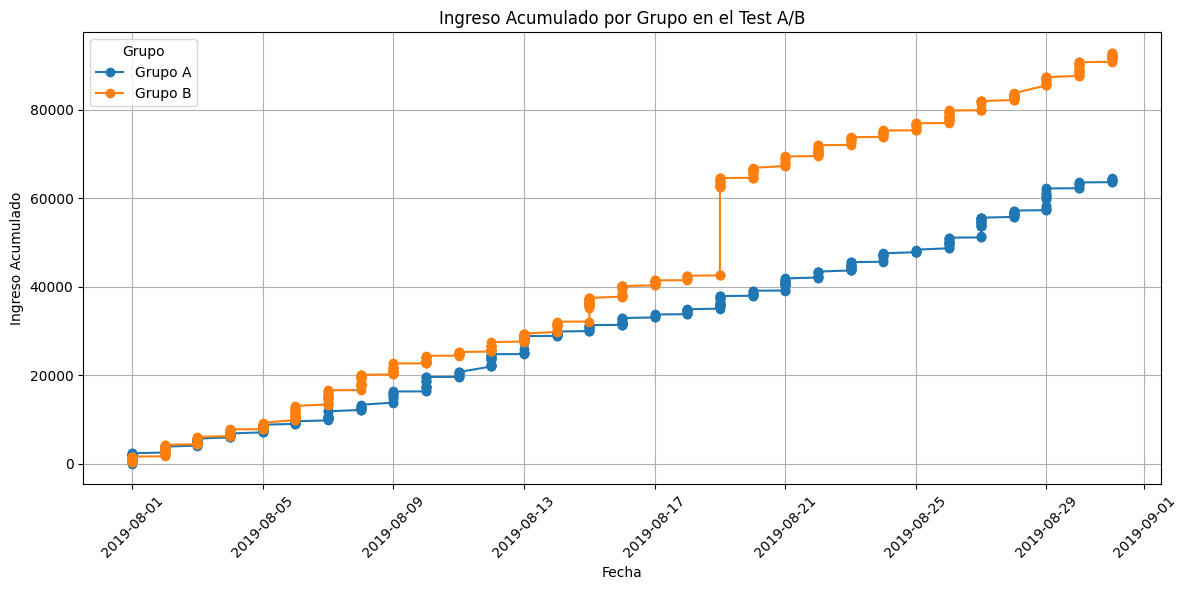

In [36]:
plt.figure(figsize=(12, 6))
for group in df_orders_cleaned['group'].unique():
    data = df_orders_cleaned[df_orders_cleaned['group'] == group]
    plt.plot(data['date'], data['cumulative_revenue'], marker='o', label=f'Grupo {group}')
    
plt.title('Ingreso Acumulado por Grupo en el Test A/B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

**El grafico claramente nos muestra un predominancia en el ingreso acumulado del un grupo B por encima del otro. Teneniendo excelentes resultados en le mes de agosto, y llegando a su pico mas alto en el mes de septiembre.**

Ahora realizaremos un grafico para representar  el tamaño de pedido promedio acumulado por grupo, para lo cual necesitaremos calcular el tamaño de pedido promedio acumulado para cada grupo, y mostrarlo como columna en nuestro Dataframe.

In [37]:
df_orders_cleaned = df_orders_cleaned.sort_values(by='date')
df_orders_cleaned['order_size'] = df_orders_cleaned['revenue']
df_orders_cleaned['cumulative_avg_order_size'] = df_orders_cleaned.groupby('group')['order_size'].cumsum() / df_orders_cleaned.groupby('group').cumcount().add(1)
df_orders_cleaned.head()

,transactionId,visitorId,date,revenue,group,cumulative_revenue,order_size,cumulative_avg_order_size
168,2065527789,1581167209,2019-08-01,30.4,A,30.4,30.4,30.400000
171,2153842875,876081193,2019-08-01,55.4,A,1842.3,55.4,42.900000
169,3588515863,1737494355,2019-08-01,30.8,A,1873.1,30.8,38.866667
155,891673177,572335325,2019-08-01,60.8,A,1933.9,60.8,44.350000
154,4206138190,1219079053,2019-08-01,80.5,A,2014.4,80.5,51.580000


Aqui primero utilizamos un sort_values(), para ordernar los datos por cfecha y generamos una nueva columna para almacenar el tamaño promedio del pedido. Finalmente calculamos el tamaño promedio acumulado del pedido usando la suma acumulativa (cumsum) y dividiendo por el conteo acumulado (cumcount().add(1)) para obtener el promedio acumulado.

Ahora vamos a iterar sobre cada grupo para graficar el tamaño de pedido promedio acumulado a lo largo del tiempo Lo personalizaremos para tener mas claras nuestras conclsuiones.

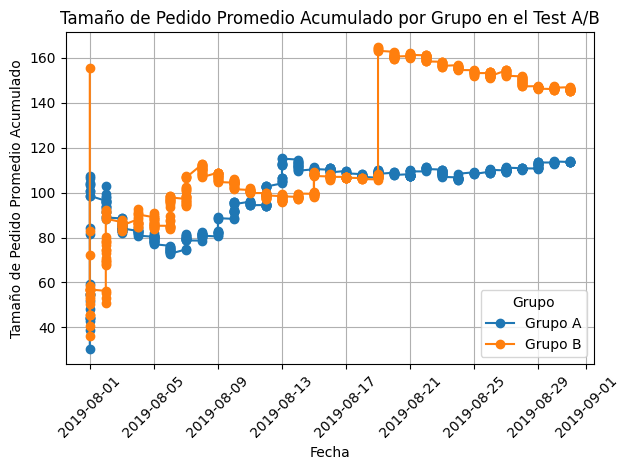

In [38]:
for group in df_orders_cleaned['group'].unique():
    data = df_orders_cleaned[df_orders_cleaned['group'] == group]
    plt.plot(data['date'], data['cumulative_avg_order_size'], marker='o', label=f'Grupo {group}')
    
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo en el Test A/B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Grupo')

plt.tight_layout()
plt.show()

**Determinamos de esta forma el tamaño promedio acomulado de cada uno de los pedidos en cada uno de los grupos, teniendo en cuenta  en promedio el grupo A tiene pedidos mas grandes que el grupo B.**

Tambien es imporante ver como difiere el tamaño de pedidos entre cada uno de los grupos. Asi que vamos a representar tambien gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

In [39]:
cumulative_avg_A = df_orders_cleaned[df_orders_cleaned['group'] == 'A'][['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'cumulative_avg_A'})
cumulative_avg_B = df_orders_cleaned[df_orders_cleaned['group'] == 'B'][['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'cumulative_avg_B'})
merged_data = pd.merge(cumulative_avg_A, cumulative_avg_B, on='date', how='inner')
merged_data.head()

,date,cumulative_avg_A,cumulative_avg_B
0,2019-08-01,30.4,155.500000
1,2019-08-01,30.4,83.050000
2,2019-08-01,30.4,72.033333
3,2019-08-01,30.4,56.675000
4,2019-08-01,30.4,50.520000


Para esto separamos los datos por grupo de test A/B y realizamos la union de estas dos tablas a travez de .merge(), para poder comparar. Ahora solo debemos calcular la diferencia relativa entre cada grupo y visualizarlas en un grafico para obtener nuestras conclusiones.

In [40]:
merged_data['relative_difference'] = (merged_data['cumulative_avg_B'] - merged_data['cumulative_avg_A']) / merged_data['cumulative_avg_A']
merged_data.head()

,date,cumulative_avg_A,cumulative_avg_B,relative_difference
0,2019-08-01,30.4,155.500000,4.115132
1,2019-08-01,30.4,83.050000,1.731908
2,2019-08-01,30.4,72.033333,1.369518
3,2019-08-01,30.4,56.675000,0.864309
4,2019-08-01,30.4,50.520000,0.661842


Ahora tenemos un dataframe, que contiene una columna que calcula la diferencia relativa en el tamaño de la compra para cada uno de los grupos de la prueba. Vamos a graficarla y modificar el grafico para entender mejor esta difencia y llegar a una conclusion, especifica.

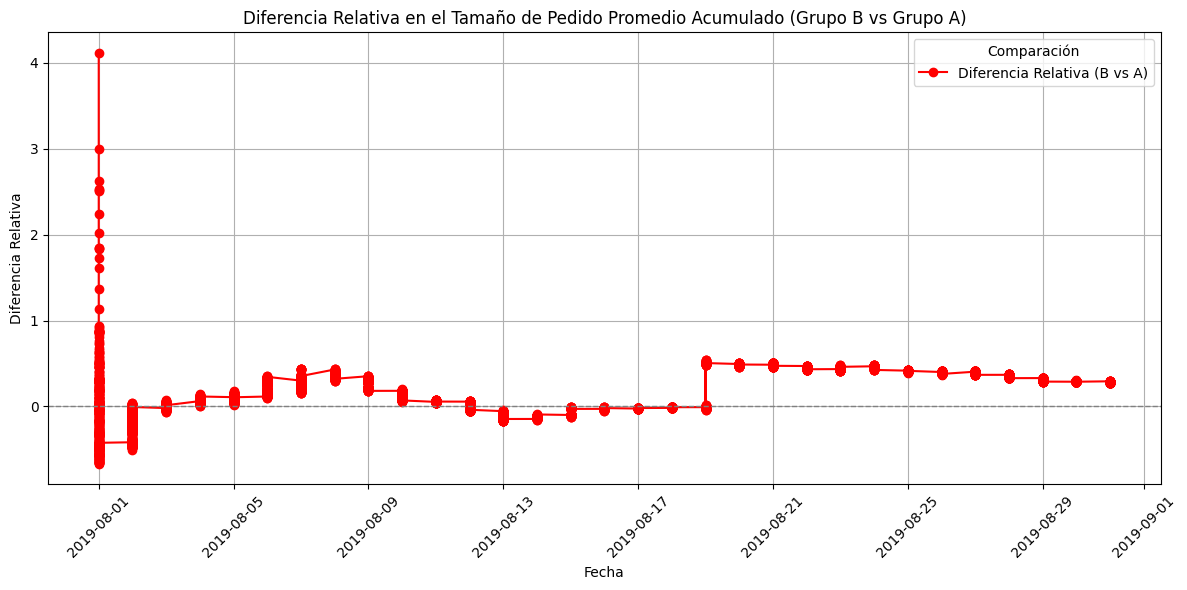

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_difference'], marker='o', color='red', linestyle='-', label='Diferencia Relativa (B vs A)')

plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.axhline(0, color='gray', linestyle='--', lw=1) 
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Comparación')

plt.tight_layout()
plt.show()

Añadimos una línea horizontal en 0 como referencia, para mostrar cuándo los tamaños de pedido promedio de ambos grupos son iguales. Luego determinamos que; **El tamaño promedio de los pedidos fluctuaron en la primera semana de adquicisiones, y luego se han mantenido a la par. No iguales por completo a excepcion de los dias 9 hasta el 19 de agosto donde estuvieron muy a la par. Pero no hay demasiada difencia en el resto de semanas  del mes de agosto para el tamaño promedio de sus pedidos, a comparacion con la primera semana del mes.**

Ahora vamos a calcular la taza de conversion en cada grupo, como la relacion entre entre los pedidos y el número de visitas de cada día. Tambien realizaremos graficos entre  las tasas de conversión diarias de los dos grupos para describir sus diferencias.

In [42]:
orders_daily = df_orders_cleaned.groupby(['date', 'group']).agg(orders=('transactionId', 'nunique')).reset_index()
visits_daily = df_visitors.groupby(['date', 'group']).agg(visits=('visits', 'sum')).reset_index()
display(orders_daily.head())
display(visits_daily.head())

,date,group,orders
0,2019-08-01,A,23
1,2019-08-01,B,17
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24


,date,group,visits
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507


De esta manera calculamos el numero de pedidos para cada grupo por dia y tambien las visistas de cada dia en cada grupo especifico, mediante una agrupacion por fecha y sumando la cantidad de visitas de cada grupo en especifico.

In [43]:
merged_data = pd.merge(orders_daily, visits_daily, on=['date', 'group'])
merged_data['conversion_rate'] = merged_data['orders'] / merged_data['visits']
merged_data.head()

,date,group,orders,visits,conversion_rate
0,2019-08-01,A,23,719,0.031989
1,2019-08-01,B,17,713,0.023843
2,2019-08-02,A,19,619,0.030695
3,2019-08-02,B,23,581,0.039587
4,2019-08-03,A,24,507,0.047337


Unimos estas dos tablas y calculamos las taza de conversion para cada grupo, dividiendo el numero de pedidos diarios por el numero de visitas diarias.Pra visualizar este resultados, debemos separa a cada grupo y crear un grafico que muestre las conversiones diarias.

In [44]:
conversion_A = merged_data[merged_data['group'] == 'A']
conversion_B = merged_data[merged_data['group'] == 'B']

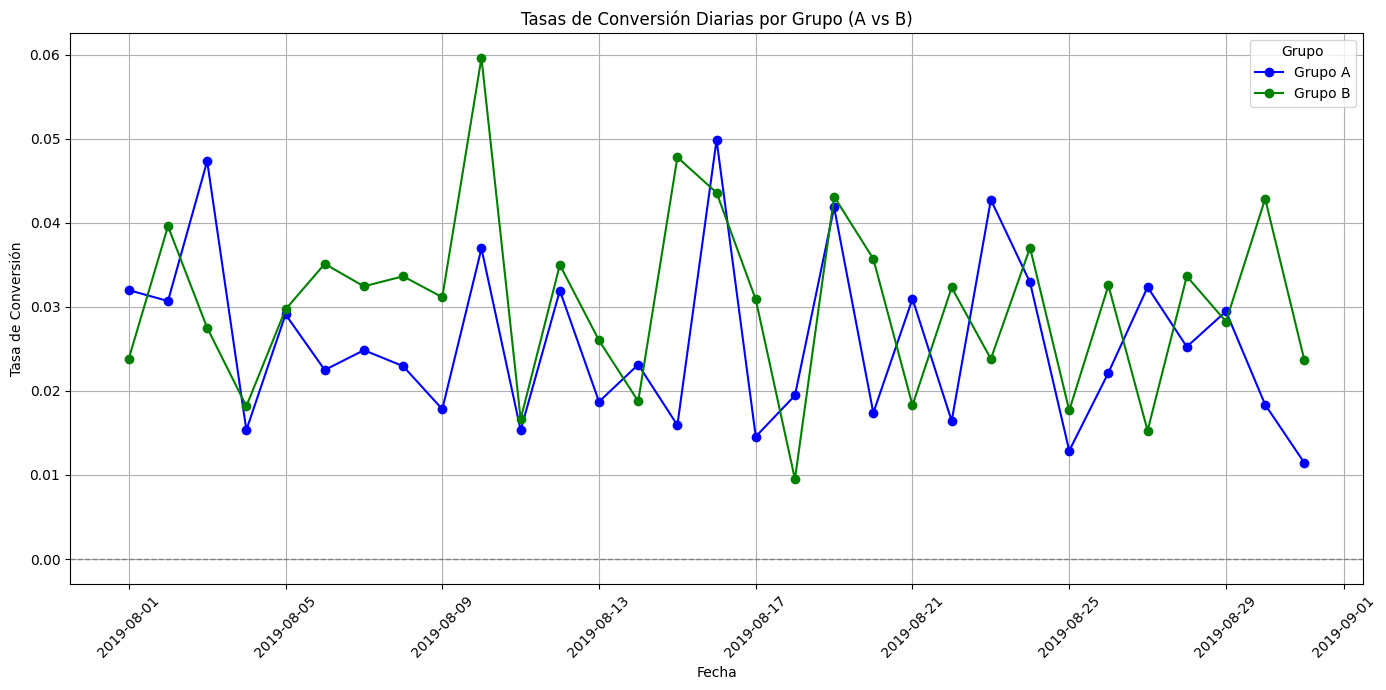

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(conversion_A['date'], conversion_A['conversion_rate'], marker='o', linestyle='-', label='Grupo A', color='blue')
plt.plot(conversion_B['date'], conversion_B['conversion_rate'], marker='o', linestyle='-', label='Grupo B', color='green')

plt.title('Tasas de Conversión Diarias por Grupo (A vs B)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.axhline(0, color='gray', linestyle='--', lw=1)  
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Grupo')

plt.tight_layout()
plt.show()

**Las variaciones en las tasas de conversión a lo largo del tiempo indican cómo responden los grupos al test A/B.con 19 registros hacia a rriba el grupo B tiene la mejor taza de conversion que el grupo A cuyos registros positivos son 8.Esto auriere que los cambios realizados en el grupo B estan teniendo un impacto positivo en esta metrica.**

Ahora calcularemos el numero de pedidos por usuario para trazar un gráfico de dispersión del número de pedidos por usuario. Y obtener conclusion a partir de esto.

In [46]:
orders_per_user = df_orders_cleaned.groupby(['visitorId', 'group']).agg(orders=('transactionId', 'nunique')).reset_index()

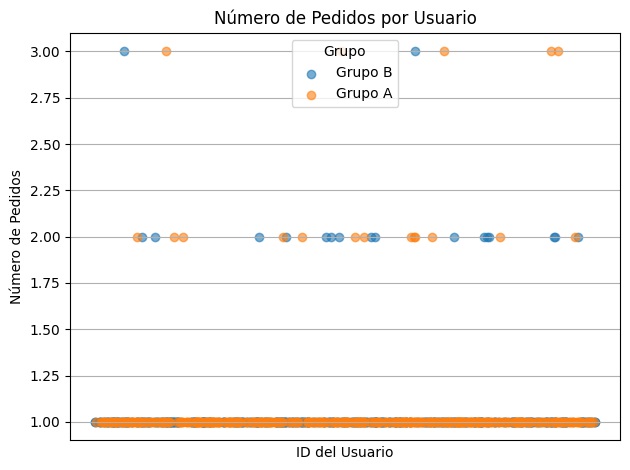

In [47]:
for group in orders_per_user['group'].unique():
    subset = orders_per_user[orders_per_user['group'] == group]
    plt.scatter(subset['visitorId'], subset['orders'], label=f'Grupo {group}', alpha=0.6)
plt.title('Número de Pedidos por Usuario')
plt.xlabel('ID del Usuario')
plt.ylabel('Número de Pedidos')
plt.legend(title='Grupo')
plt.grid(True)
plt.xticks([])

plt.tight_layout()
plt.show()

**Determinamos de esta forma que en cuanto al tmaño de cada una de las compras, el grupo A del test parece tener mayor cantidad de pedidos grandes, a comparacion con el tamaño de compra promedio del grupo B.**

Tenemos valores atipicos que no podemos ignorar en nuestro grafico de dispersion, ya que puede ser que estos pocos pedidos grandres represneten un beneficio importante para la tienda, el objetivo sera determinar el punto en el cual los datos se vuelven anomalos, y para esto calcularemos los ultimos percentiles de la grafica. 

In [48]:
orders_per_user.head()

,visitorId,group,orders
0,5114589,B,1
1,6958315,B,1
2,11685486,A,1
3,39475350,B,1
4,47206413,B,1


In [49]:
percentile_95 = np.percentile(orders_per_user['orders'], 95)
percentile_99 = np.percentile(orders_per_user['orders'], 99)
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")

Percentil 95: 1.0
Percentil 99: 2.0


De esta forma deterninamos cuales son los valores a partir de los cuales el tmaño promedio de los pedidos de los suuarios en cada test empieza a volverse anomalo. Ahora definiremos esta metrica de manera mas clara.

In [50]:
anomaly_threshold_95 = percentile_95
anomaly_threshold_99 = percentile_99
anomalies_95 = orders_per_user[orders_per_user['orders'] > anomaly_threshold_95]
anomalies_99 = orders_per_user[orders_per_user['orders'] > anomaly_threshold_99]
print(f"Anomalías (por encima del percentil 95): \n{anomalies_95}")
print(f"Anomalías (por encima del percentil 99): \n{anomalies_99}")

Anomalías (por encima del percentil 95): 
      visitorId group  orders
55    249864742     B       3
82    366673373     A       2
94    406208401     B       2
118   522292794     B       2
138   611059232     A       3
157   678354126     A       2
176   759473111     A       2
323  1404560065     B       2
375  1617417821     A       2
380  1637811943     B       2
407  1772171838     A       2
452  1985475298     B       2
459  2025197455     B       2
476  2096506107     B       2
478  2108163459     A       3
509  2232111114     A       2
529  2306096143     A       2
539  2366521417     B       2
548  2397843657     B       2
624  2706377257     A       2
628  2733145037     A       2
632  2742574263     B       3
634  2744017357     A       2
664  2892265953     A       2
687  2988190573     A       3
709  3077396270     B       2
780  3332057097     B       2
787  3362039251     B       2
792  3379260072     B       2
807  3469608676     A       2
890  3908431265     A       

Un punto se considera anomalia si supera los humbrales 95 y 99. A partir de este concepto, Filtramos los datos para obtener las anomalías que están por encima de estos umbrales.

**Determinamos de esta forma que los pedidos de los usuarios empiezan a volverse anomalo a partir de la realizacion de 2 a 3 pedidos.**

Tambien es importante verificar que de cuanto fue la inversion de cada uno de los usuarios en sus pedidos respectivos.Para esto vamos a trazar un gráfico de dispersión de los precios de los pedidos.

In [51]:
df_orders_cleaned.head()

,transactionId,visitorId,date,revenue,group,cumulative_revenue,order_size,cumulative_avg_order_size
168,2065527789,1581167209,2019-08-01,30.4,A,30.4,30.4,30.400000
171,2153842875,876081193,2019-08-01,55.4,A,1842.3,55.4,42.900000
169,3588515863,1737494355,2019-08-01,30.8,A,1873.1,30.8,38.866667
155,891673177,572335325,2019-08-01,60.8,A,1933.9,60.8,44.350000
154,4206138190,1219079053,2019-08-01,80.5,A,2014.4,80.5,51.580000


Utilizaremos las columnas que contienen el Id de transaccion, para agregarlas al grafico  con la columna que contiene el beneficio (valor) de cada uno de los pedidos.

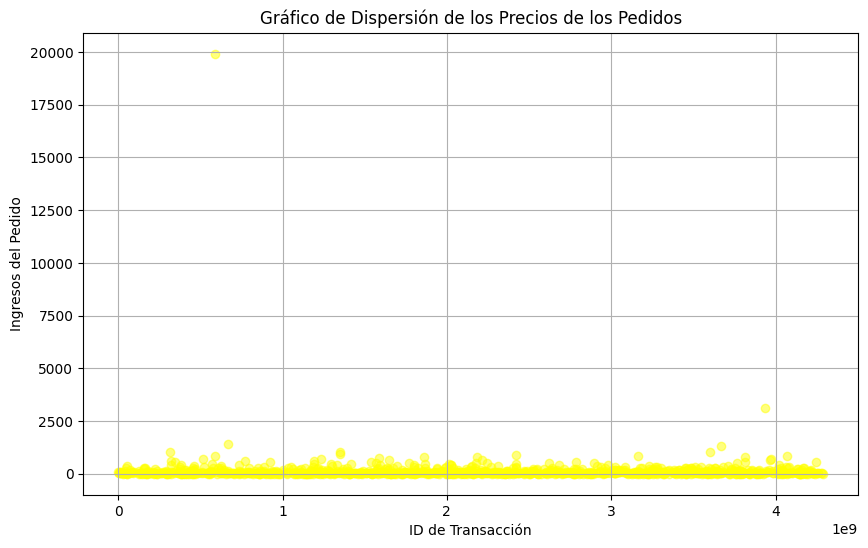

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df_orders_cleaned['transactionId'], df_orders_cleaned['revenue'], alpha=0.5, color='yellow')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.xlabel('ID de Transacción')
plt.ylabel('Ingresos del Pedido')
plt.grid(True)
plt.show()

**De esta forma observamos que los valores de los pedidos se manejan normalmente entre los 2500 a excepcion de alguno de ellos que oscilan los  20000 en el cual puede ser anomalo, para esto calcularemos  los valores de los ultimos percentiles de esta grafica.**

Devido a esta anomalia en el valor dentro del precio de este pedido, vamos ha calcular el punto en el que estos valores empiezan a ser anomalos, encontrando el valor de los ultimos percentiles.

In [53]:
percentile_95 = np.percentile(df_orders_cleaned['revenue'], 95)
percentile_99 = np.percentile(df_orders_cleaned['revenue'], 99)
display(f'Percentil 95: {percentile_95}')
display(f'Percentil 99: {percentile_99}')

'Percentil 95: 414.275'

'Percentil 99: 830.3'

De esta manera obtenemos los valores de los percentiles 95 y 99 de la columna 'rvenue' en el dataframe df_orders_cleaned, y para determianr que valore as anomalo, colocaremos una condicion para que aquellos valores mas arriba del percentil 99 se representen como anomalos.

In [54]:
anomalies = df_orders_cleaned[df_orders_cleaned['revenue'] > percentile_99]

display(f'Número de anomalías: {len(anomalies)}')
display(anomalies.reset_index())

'Número de anomalías: 9'

,index,transactionId,visitorId,date,revenue,group,cumulative_revenue,order_size,cumulative_avg_order_size
0,940,2420050534,4003628586,2019-08-08,905.8,B,19264.6,905.8,112.488971
1,743,3603576309,4133034833,2019-08-09,1050.0,A,14903.8,1050.0,88.216993
2,1099,316924019,148427295,2019-08-12,1015.9,A,23512.6,1015.9,98.747396
3,1103,1348774318,1164614297,2019-08-12,1025.8,A,21964.1,1025.8,103.098454
4,1136,666610489,1307669133,2019-08-13,1425.8,A,27382.4,1425.8,112.611058
5,1196,3936777065,2108080724,2019-08-15,3120.1,B,35246.2,3120.1,108.964260
6,425,590470918,1920142716,2019-08-19,19920.4,B,62538.5,19920.4,164.586337
7,949,1347999392,887908475,2019-08-21,930.0,A,40254.6,930.0,109.837538
8,744,3668308183,888512513,2019-08-27,1335.6,B,81321.5,1335.6,154.370842


**No mas de 9 usuarios realizaron una compra, desde este punto se etablece que el precio de una compra es anomalo.**

Ahora vamos a encontar la significancia estadistica en las tazas de conversion entre los usuarios con nuestros datos en bruto, y de esta manera obtener conlusiones y conjeturas.

In [55]:
visits_grouped = df_visitors.groupby('group')['visits'].sum().reset_index()
orders_grouped = df_orders_cleaned.groupby('group')['transactionId'].count().reset_index()
conversion_rate = pd.merge(visits_grouped, orders_grouped, on='group')
conversion_rate.columns = ['group', 'visits', 'orders']
conversion_rate['conversion_rate'] = conversion_rate['orders'] / conversion_rate['visits'] 
conversion_rate.head()

,group,visits,orders,conversion_rate
0,A,18736,468,0.024979
1,B,18916,548,0.028970


De esta forma obtenemos el valor para la taza de conversion de cada uno de los  usuarios en los grupos del tesr A/B realizados.Ahora debemos generemos una hipotesis nula y una alternativa para comprobar la relacion en esta significancia estadistica. Con nuestros datos filtrados.

**(H0): No hay diferencia en las tasas de conversión entre los grupos A y B.**


**(H1): Hay una diferencia en las tasas de conversión entre los grupos A y B.**

In [56]:
conversion_A = conversion_rate.loc[conversion_rate['group'] == 'A', 'conversion_rate'].values[0]
conversion_B = conversion_rate.loc[conversion_rate['group'] == 'B', 'conversion_rate'].values[0]
n_A = conversion_rate.loc[conversion_rate['group'] == 'A', 'visits'].values[0]
n_B = conversion_rate.loc[conversion_rate['group'] == 'B', 'visits'].values[0]

Asi es como extraemos la conversion y los tamaños de muestra de cada uno de los grupos para las pruebas A/B.

In [57]:
conversion_combined = (conversion_A * n_A + conversion_B * n_B) / (n_A + n_B)
std_combined = ((conversion_combined * (1 - conversion_combined)) * (1/n_A + 1/n_B)) ** 0.5
z_score = (conversion_B - conversion_A) / std_combined
print(f'Estadística Z: {z_score}')
p_value = 1 - norm.cdf(abs(z_score))

print(f'Valor p: {p_value}')

Estadística Z: 2.3899344431697442
Valor p: 0.008425690217351511


Calculamos la conversion y la desviasion estandar combinada para obtener de esta manera el estadistico Z, y el valor P para realizar nuestra prueba de hipotesis.

In [58]:
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")

Rechazamos la hipótesis nula: hay una diferencia significativa en las tasas de conversión entre los grupos A y B.


Definimos un valor para alfa e interamos sobre los resultados para abtener nuestro resultado.Determinado de esta forma que **si existe una diferencia significativa para las tasas de conversion entre los grupos A y B.**

Utilizando este mismo enfoque, calcularemos la significansia estadistica para el tamaño promedio de cada uno de los pedidos y poder compararlos para obtener conslusiones y conjeturas.

**(H0): No hay diferencia en el tamaño promedio de pedido entre los grupos A y B**

**(H1): Hay una diferencia en el tamaño promedio de pedido entre los grupos A y B**

In [59]:
group_A = df_orders[df_orders['group'] == 'A']['revenue']
group_B = df_orders[df_orders['group'] == 'B']['revenue']

mean_A = group_A.mean()
std_A = group_A.std()
mean_B = group_B.mean()
std_B = group_B.std()
display(f'Grupo A - Media: {mean_A}, Desviación estándar: {std_A}')
display(f'Grupo B - Media: {mean_B}, Desviación estándar: {std_B}')

'Grupo A - Media: 115.89748653500897, Desviación estándar: 182.35891775769414'

'Grupo B - Media: 145.06343750000002, Desviación estándar: 806.9923263645859'

De esta forma obtenemos los estadisticos necesarios pra realizar, nuestra prueba de hipotesis teneiendo resultados interesantes con respecto a la desviacion estandar de cada uno de los grupos, vamos a visualizarlo mejor comprovando como interactuan estas metricas con el valor p de la prueba y obteniendo resultados.

In [60]:
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")

Rechazamos la hipótesis nula: hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


**Comprobamos entonces que nuestra hiptesis alternativa es la correcta y si hay una diferencia significativa en el tamaño promedio de los pedidos para cada grupo del dest A/B. Esto era de esperarse, ya que las estadisticas descriptivas del codigo anterior reflejaban una mejores metricas para el grupo B.**

**DETERMINAMOS ENTONCES COMO CONCLUSION FINAL Y BASANDONOS EN LAS CONCLUCIONES PRELIMINARES QUE OBTUVIMOS DE LOS ANALISIS PREVIOS; QUE EL GRUPO PREDOMINANTE EN LOS RESULTADOS DEL TEST A/B ES EL GRUPO B, YA QUE GENERO MEJORES METRICAS Y DEMOSTRO PREDOMINANCIA EN ASPECTOS DE TAZAS DE CONVERSION Y TAMAÑOS DE COMPRA.LOS CAMBIOS GENERADOS EN ESTE GRUPO TIENEN UNA TENDENCIA POSISTIVA QUE SE MANTIENE O AUMENTA CON EL PASO DEL TIEMPO.**